In [87]:
# Re-import necessary libraries after execution reset
import pandas as pd

# Reload the dataset
df = pd.read_csv('/Users/talhakimi/data-science-flights-project/Data/Cleaned_AllFlightsDataFinal.csv')

def remove_outliers_tukey(df, column="Price", groupby_cols=["Origin", "Destination"]):
    cleaned_list = []
    for _, group in df.groupby(groupby_cols):
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = (group[column] >= lower_bound) & (group[column] <= upper_bound)
        cleaned_list.append(group[mask])  

    return pd.concat(cleaned_list, ignore_index=True)  

df_cleaned = remove_outliers_tukey(df)

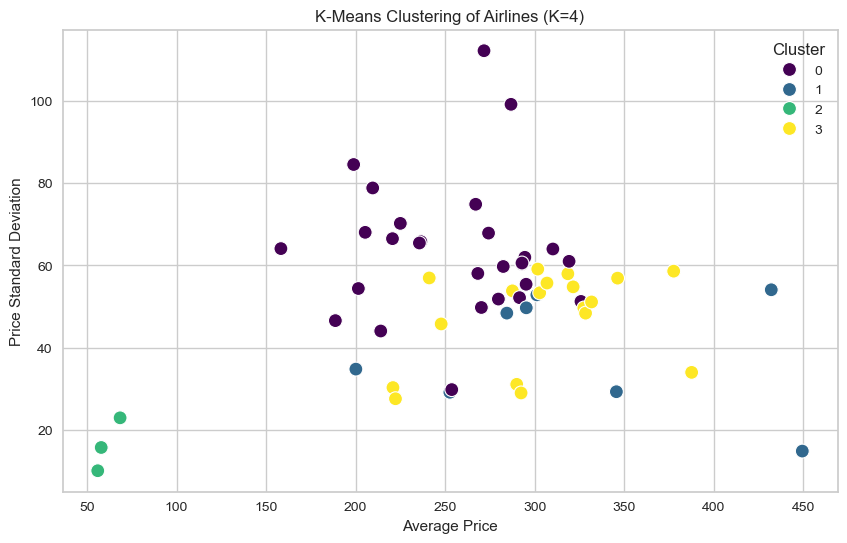

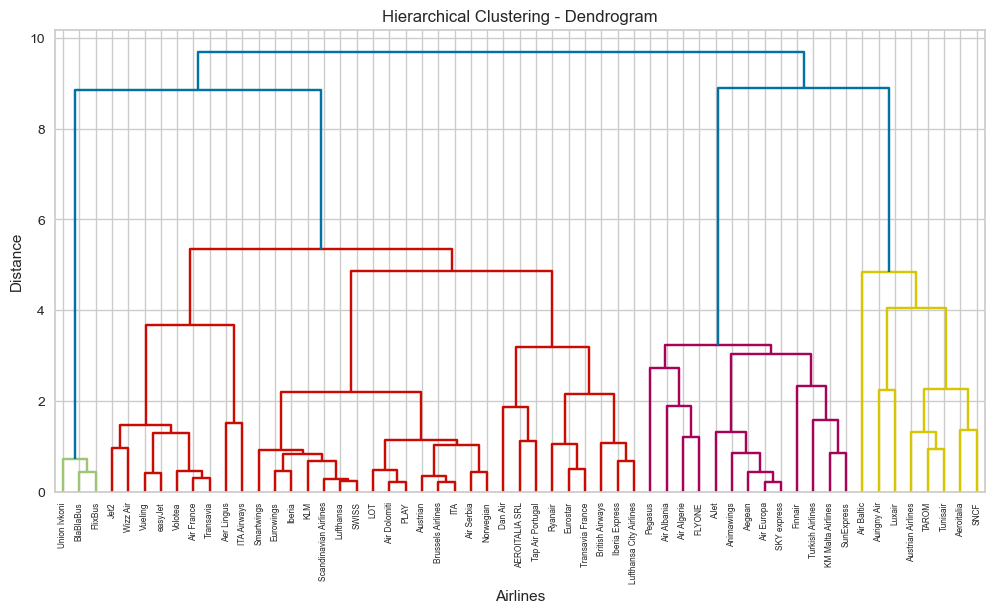


üìä **Cluster Insights:**
          avg_price  price_variability   min_price   max_price  \
Cluster                                                          
0        256.110548          63.512081  158.296228  325.887538   
1        320.152698          39.117565  200.165680  449.500000   
2         60.801798          16.216541   56.000000   68.476190   
3        302.952171          47.432580  220.880952  387.696379   

         airlines_in_cluster  
Cluster                       
0                         28  
1                          8  
2                          3  
3                         18  

‚úÖ ◊ß◊ï◊ë◊• ◊¢◊ù ◊î◊ß◊ú◊ê◊°◊ò◊®◊ô◊ù ◊†◊©◊û◊® ◊ë◊©◊ù: Airline_Clusters_KMeans.csv


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# üîπ 1. ◊ó◊ô◊©◊ï◊ë ◊†◊™◊ï◊†◊ô◊ù ◊û◊¶◊ò◊ë◊®◊ô◊ù ◊ú◊õ◊ú ◊ó◊ë◊®◊™ ◊™◊¢◊ï◊§◊î
airline_stats = df.groupby("Airline").agg({
    "Price": ["mean", "std"],      # ◊û◊ó◊ô◊® ◊û◊û◊ï◊¶◊¢ ◊ï◊°◊ò◊ô◊ô◊™ ◊™◊ß◊ü
    "Duration": "mean",             # ◊ñ◊û◊ü ◊ò◊ô◊°◊î ◊û◊û◊ï◊¶◊¢
    "Stops": "mean"                 # ◊û◊°◊§◊® ◊ó◊†◊ô◊ï◊™ ◊û◊û◊ï◊¶◊¢
}).reset_index()

# ◊©◊ô◊†◊ï◊ô ◊©◊ù ◊î◊¢◊û◊ï◊ì◊ï◊™
airline_stats.columns = ["Airline", "avg_price", "std_price", "avg_duration", "avg_stops"]

# üîπ 2. ◊†◊®◊û◊ï◊ú ◊î◊†◊™◊ï◊†◊ô◊ù ◊î◊û◊°◊§◊®◊ô◊ô◊ù
scaler = StandardScaler()
scaled_features = scaler.fit_transform(airline_stats.iloc[:, 1:])  

# üîπ 3. ◊ß◊ë◊ô◊¢◊™ ◊û◊°◊§◊® ◊î◊ß◊ú◊ê◊°◊ò◊®◊ô◊ù ◊î◊ê◊ï◊§◊ò◊ô◊û◊ú◊ô ◊ë◊ê◊û◊¶◊¢◊ï◊™ ◊û◊ì◊ì ◊î◊°◊ô◊ú◊ï◊ê◊ò◊î
silhouette_scores = []
k_range = range(2, 6)  # ◊†◊ë◊ì◊ï◊ß ◊ë◊ô◊ü 2 ◊ú-5 ◊ê◊©◊õ◊ï◊ú◊ï◊™

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# üîπ 4. ◊û◊¶◊ô◊ê◊™ ◊û◊°◊§◊® ◊î◊ê◊©◊õ◊ï◊ú◊ï◊™ ◊î◊ò◊ï◊ë ◊ë◊ô◊ï◊™◊®
best_k = k_range[np.argmax(silhouette_scores)]

# üîπ 5. ◊î◊®◊¶◊™ K-Means ◊¢◊ù ◊û◊°◊§◊® ◊î◊ê◊©◊õ◊ï◊ú◊ï◊™ ◊î◊ê◊ï◊§◊ò◊ô◊û◊ú◊ô
kmeans_optimal = KMeans(n_clusters=best_k, random_state=42, n_init=10)
airline_stats["Cluster"] = kmeans_optimal.fit_predict(scaled_features)

# üîπ 6. ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊ú◊î◊¶◊í◊™ ◊î◊ß◊ú◊ê◊°◊ò◊®◊ô◊ù
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=airline_stats["avg_price"], 
    y=airline_stats["std_price"], 
    hue=airline_stats["Cluster"], 
    palette="viridis",
    s=100
)
plt.title(f"K-Means Clustering of Airlines (K={best_k})")
plt.xlabel("Average Price")
plt.ylabel("Price Standard Deviation")
plt.show()
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=airline_stats["Airline"].values, leaf_rotation=90)
plt.title("Hierarchical Clustering - Dendrogram")
plt.xlabel("Airlines")
plt.ylabel("Distance")
plt.show()


# üîπ 7. ◊î◊¶◊í◊™ ◊û◊û◊ï◊¶◊¢◊ô◊ù ◊ú◊§◊ô ◊ê◊©◊õ◊ï◊ú
cluster_insights = airline_stats.groupby("Cluster").agg(
    avg_price=("avg_price", "mean"),
    price_variability=("std_price", "mean"),
    min_price=("avg_price", "min"),
    max_price=("avg_price", "max"),
    airlines_in_cluster=("Cluster", "count")
)

# ◊î◊¶◊í◊™ ◊°◊ô◊õ◊ï◊ù ◊î◊ß◊ú◊ê◊°◊ò◊®◊ô◊ù
print("\nüìä **Cluster Insights:**")
print(cluster_insights)

# üîπ 8. ◊©◊û◊ô◊®◊™ ◊î◊†◊™◊ï◊†◊ô◊ù ◊¢◊ù ◊î◊ß◊ú◊ê◊°◊ò◊®◊ô◊ù ◊î◊ó◊ì◊©◊ô◊ù ◊ú◊ß◊ï◊ë◊• CSV
airline_stats.to_csv("Airline_Clusters_KMeans.csv", index=False)
print("\n‚úÖ ◊ß◊ï◊ë◊• ◊¢◊ù ◊î◊ß◊ú◊ê◊°◊ò◊®◊ô◊ù ◊†◊©◊û◊® ◊ë◊©◊ù: Airline_Clusters_KMeans.csv")


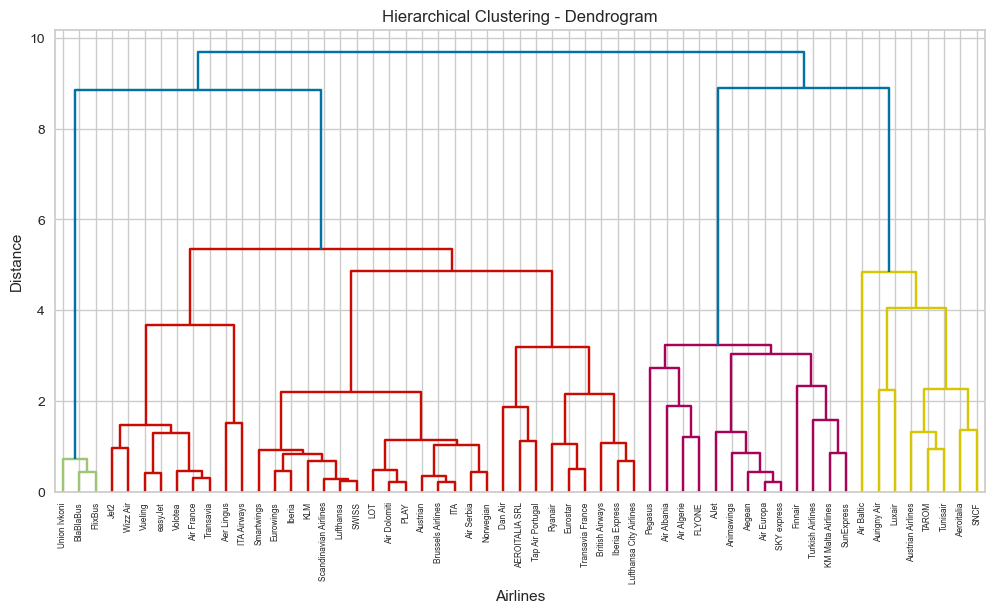


üìä Silhouette Score: 0.314


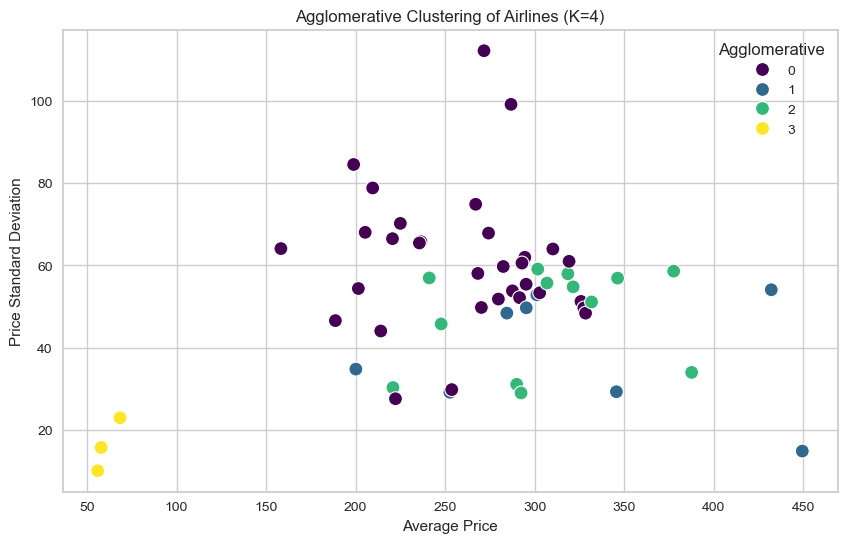


üìä **Cluster Insights:**
                avg_price  price_variability   min_price   max_price  \
Agglomerative                                                          
0              261.811228          60.940320  158.296228  328.455172   
1              320.152698          39.117565  200.165680  449.500000   
2              306.497223          47.776474  220.880952  387.696379   
3               60.801798          16.216541   56.000000   68.476190   

               airlines_in_cluster  
Agglomerative                       
0                               33  
1                                8  
2                               13  
3                                3  

‚úÖ ◊ß◊ï◊ë◊• ◊¢◊ù ◊î◊ß◊ú◊ê◊°◊ò◊®◊ô◊ù ◊†◊©◊û◊® ◊ë◊©◊ù: Airline_Clusters_Agglomerative.csv


In [89]:
#Agglomerative Clustering
linked = linkage(scaled_features, method="ward")  # ◊ß◊ô◊©◊ï◊®◊ô◊ï◊™ ◊î◊ô◊®◊®◊õ◊ô◊™ ◊¢◊ù Ward method

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=airline_stats["Airline"].values, leaf_rotation=90)
plt.title("Hierarchical Clustering - Dendrogram")
plt.xlabel("Airlines")
plt.ylabel("Distance")
plt.show()

# üîπ 5. ◊ë◊ó◊ô◊®◊™ ◊û◊°◊§◊® ◊î◊ê◊©◊õ◊ï◊ú◊ï◊™ ◊î◊ò◊ï◊ë ◊ë◊ô◊ï◊™◊® (◊ú◊§◊ô ◊î◊ì◊†◊ì◊®◊ï◊í◊®◊û◊î)
optimal_clusters = 4  # ◊†◊ô◊™◊ü ◊ú◊©◊†◊ï◊™ ◊ë◊î◊™◊ê◊ù ◊ú◊ì◊†◊ì◊®◊ï◊í◊®◊û◊î

# üîπ 6. ◊î◊®◊¶◊™ Agglomerative Clustering ◊¢◊ù ◊û◊°◊§◊® ◊î◊ê◊©◊õ◊ï◊ú◊ï◊™ ◊©◊†◊ë◊ó◊®
agglo = AgglomerativeClustering(n_clusters=optimal_clusters, linkage="ward")
airline_stats["Agglomerative"] = agglo.fit_predict(scaled_features)

# üîπ 7. ◊ó◊ô◊©◊ï◊ë ◊û◊ì◊ì ◊°◊ô◊ú◊ï◊ê◊ò◊î ◊õ◊ì◊ô ◊ú◊ë◊ì◊ï◊ß ◊ê◊™ ◊ê◊ô◊õ◊ï◊™ ◊î◊ê◊©◊õ◊ï◊ú◊ï◊™
silhouette_avg = silhouette_score(scaled_features, airline_stats["Agglomerative"])
print(f"\nüìä Silhouette Score: {silhouette_avg:.3f}")

# üîπ 8. ◊ô◊¶◊ô◊®◊™ ◊™◊®◊©◊ô◊ù ◊§◊ô◊ñ◊ï◊® ◊ú◊î◊û◊ó◊©◊™ ◊î◊ß◊ú◊ê◊°◊ò◊®◊ô◊†◊í
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=airline_stats["avg_price"], 
    y=airline_stats["std_price"], 
    hue=airline_stats["Agglomerative"], 
    palette="viridis",
    s=100
)
plt.title(f"Agglomerative Clustering of Airlines (K={optimal_clusters})")
plt.xlabel("Average Price")
plt.ylabel("Price Standard Deviation")
plt.show()

# üîπ 9. ◊î◊¶◊í◊™ ◊°◊ô◊õ◊ï◊ù ◊ê◊©◊õ◊ï◊ú◊ï◊™
cluster_summary = airline_stats.groupby("Agglomerative").agg(
    avg_price=("avg_price", "mean"),
    price_variability=("std_price", "mean"),
    min_price=("avg_price", "min"),
    max_price=("avg_price", "max"),
    airlines_in_cluster=("Agglomerative", "count")
)

print("\nüìä **Cluster Insights:**")
print(cluster_summary)

# üîπ 10. ◊©◊û◊ô◊®◊™ ◊î◊†◊™◊ï◊†◊ô◊ù ◊¢◊ù ◊î◊ß◊ú◊ê◊°◊ò◊®◊ô◊ù ◊î◊ó◊ì◊©◊ô◊ù ◊ú◊ß◊ï◊ë◊• CSV
airline_stats.to_csv("Airline_Clusters_Agglomerative.csv", index=False)
print("\n‚úÖ ◊ß◊ï◊ë◊• ◊¢◊ù ◊î◊ß◊ú◊ê◊°◊ò◊®◊ô◊ù ◊†◊©◊û◊® ◊ë◊©◊ù: Airline_Clusters_Agglomerative.csv")


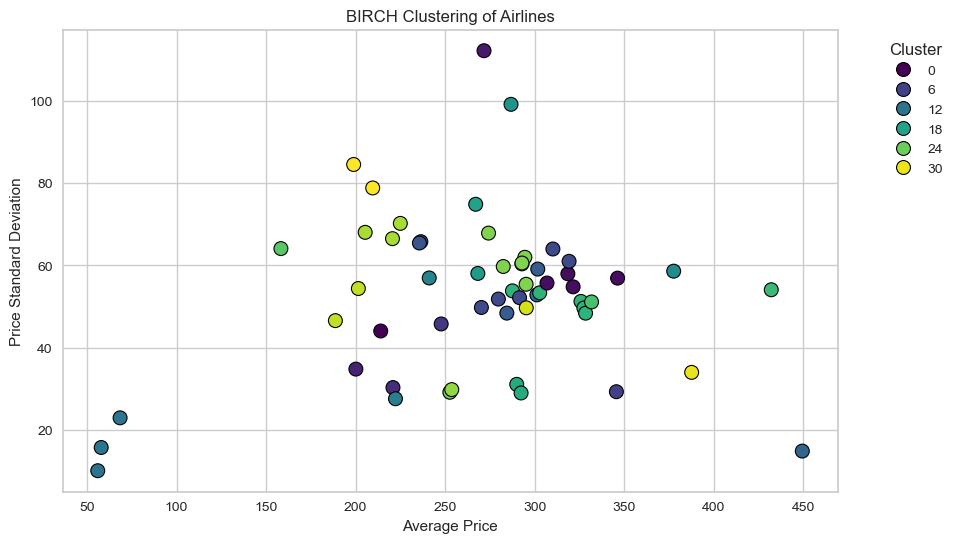

In [90]:
from sklearn.cluster import Birch

# üîπ 1. ◊î◊®◊¶◊™ BIRCH ◊¢◊ù ◊°◊£ (threshold) ◊©◊û◊ï◊†◊¢ ◊ô◊¶◊ô◊®◊™ ◊ê◊©◊õ◊ï◊ú◊ï◊™ ◊í◊ì◊ï◊ú◊ô◊ù ◊û◊ì◊ô
birch = Birch(n_clusters=None, threshold=0.5)  # threshold ◊©◊ï◊ú◊ò ◊¢◊ú ◊®◊û◊™ ◊î◊§◊ô◊¶◊ï◊ú
airline_stats["Cluster_BIRCH"] = birch.fit_predict(scaled_features)

# üîπ 2. ◊ë◊ì◊ô◊ß◊™ ◊ó◊ú◊ï◊ß◊™ ◊î◊ó◊ë◊®◊ï◊™ ◊ú◊§◊ô ◊î◊ê◊©◊õ◊ï◊ú◊ï◊™ ◊î◊ó◊ì◊©◊ô◊ù
birch_cluster_summary = airline_stats.groupby("Cluster_BIRCH").agg(
    avg_price=("avg_price", "mean"),
    price_variability=("std_price", "mean"),
    min_price=("avg_price", "min"),
    max_price=("avg_price", "max"),
    airlines_in_cluster=("Cluster_BIRCH", "count")
)

# ◊î◊¶◊í◊™ ◊î◊™◊ï◊¶◊ê◊ï◊™ ◊©◊ú BIRCH
birch_cluster_summary
# üîπ ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊§◊ô◊ñ◊ï◊® ◊¢◊ù ◊¢◊ô◊í◊ï◊ú◊ô◊ù ◊ú◊î◊û◊ó◊©◊™ ◊î◊ß◊ú◊ê◊°◊ò◊®◊ô◊ù ◊©◊ú BIRCH

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=airline_stats["avg_price"], 
    y=airline_stats["std_price"], 
    hue=airline_stats["Cluster_BIRCH"], 
    palette="viridis",
    s=100,
    edgecolor="black"  # ◊û◊ï◊°◊ô◊£ ◊ß◊ï◊ï◊ô ◊û◊™◊ê◊® ◊ú◊¢◊ô◊í◊ï◊ú◊ô◊ù
)
plt.title("BIRCH Clustering of Airlines")
plt.xlabel("Average Price")
plt.ylabel("Price Standard Deviation")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')  # ◊î◊¶◊í◊™ ◊û◊ß◊®◊ê ◊û◊ó◊ï◊• ◊ú◊í◊®◊£
plt.show()


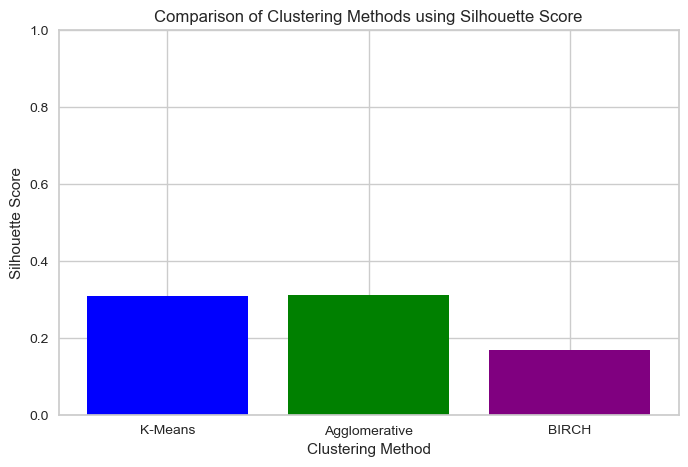

{'K-Means': 0.30905147728418025,
 'Agglomerative': 0.313708835075437,
 'BIRCH': 0.17064606710526695}

In [91]:
# üîπ ◊ó◊ô◊©◊ï◊ë ◊û◊ì◊ì◊ô ◊°◊ô◊ú◊ï◊ê◊ò◊î ◊ú◊õ◊ú ◊©◊ô◊ò◊î ◊¢◊ù ◊©◊û◊ï◊™ ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊î◊û◊ì◊ï◊ô◊ß◊ô◊ù
silhouette_scores = {
    "K-Means": silhouette_score(scaled_features, airline_stats["Cluster"]),
    "Agglomerative": silhouette_score(scaled_features, airline_stats["Agglomerative"]),
    "BIRCH": silhouette_score(scaled_features, airline_stats["Cluster_BIRCH"])
}

# üîπ ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊î◊©◊ï◊ï◊ê◊™◊ô ◊ú◊û◊ì◊ì◊ô ◊î◊°◊ô◊ú◊ï◊ê◊ò◊î ◊©◊ú ◊õ◊ú ◊©◊ô◊ò◊î
plt.figure(figsize=(8,5))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color=['blue', 'green', 'purple'])
plt.xlabel("Clustering Method")
plt.ylabel("Silhouette Score")
plt.title("Comparison of Clustering Methods using Silhouette Score")
plt.ylim(0, 1)  # ◊ò◊ï◊ï◊ó ◊¢◊®◊õ◊ô◊ù ◊ë◊ô◊ü 0 ◊ú-1 ◊ú◊û◊ì◊ì ◊î◊°◊ô◊ú◊ï◊ê◊ò◊î
plt.show()

# ◊î◊¶◊í◊™ ◊†◊™◊ï◊†◊ô ◊î◊°◊ô◊ú◊ï◊ê◊ò◊î ◊õ◊î◊©◊ï◊ï◊ê◊î
silhouette_scores
